## Complete the Tasks Below

**TASK: Run the imports below**

In [301]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [302]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

**TASK: Display the DataFrame**

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [304]:
#CODE HERE
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


**TASK: Transpose the DataFrame so that the columns are now the index.**

In [305]:
#CODE HERE
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TASK: Create a heatmap from the DataFrame. Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

In [306]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


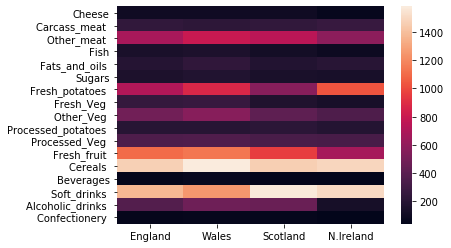

In [307]:
#CODE HERE
sns.heatmap(df)

**TASK: Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [308]:
#CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape, Input
from tensorflow.keras.optimizers import SGD

**TASK: Create an encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2**

In [309]:
#CODE HERE
encoder = Sequential()
encoder.add(Dense(8,activation="relu", input_shape=[17]))
encoder.add(Dense(4,activation="relu"))
encoder.add(Dense(2,activation="relu"))


**TASK: Create a decoder. In the solutions we built one that went 2-->4-->8-->17**

In [310]:
#CODE HERE
decoder = Sequential()
#decoder.add(Input(shape=[2]))
decoder.add(Dense(4,activation="relu", input_shape=[2]))
decoder.add(Dense(8, activation="relu"))
decoder.add(Dense(17, activation="relu"))
#decoder.add(Dense(17, activation="sigmoid"))


**TASK: Combine the encoder and decoder to be an autoencoder and compile the model.**

In [311]:
#CODE HERE
autoencoder = Sequential([
    encoder,
    decoder
])

autoencoder.compile(
   # optimizer= SGD(lr=0.5),
    optimizer = 'adam',
    loss="mse",
    # loss="binary_crossentropy"
)
autoencoder.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_55 (Sequential)   (None, 2)                 190       
_________________________________________________________________
sequential_56 (Sequential)   (None, 17)                205       
Total params: 395
Trainable params: 395
Non-trainable params: 0
_________________________________________________________________


In [312]:
df_trans = df.transpose()
df_trans

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TASK: Create a MinMaxScaler to scale the data. Make sure to transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [313]:
#CODE HERE
from sklearn.preprocessing import MinMaxScaler


In [314]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_trans)

In [315]:
df_scaled

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [316]:
# NOTE the shape should be 17 columns by 4 rows.

**TASK: Fit the autoencoder to the scaled data for 15 epochs.**

In [317]:
#CODE HERE

autoencoder.fit(x=df_scaled, y=df_scaled ,epochs=20)

Train on 4 samples
Epoch 1/20
4/4 [==============================] - 1s 206ms/sample - loss: 0.4152
Epoch 2/20
4/4 [==============================] - 0s 796us/sample - loss: 0.4140
Epoch 3/20
4/4 [==============================] - 0s 771us/sample - loss: 0.4128
Epoch 4/20
4/4 [==============================] - 0s 759us/sample - loss: 0.4116
Epoch 5/20
4/4 [==============================] - 0s 814us/sample - loss: 0.4103
Epoch 6/20
4/4 [==============================] - 0s 948us/sample - loss: 0.4091
Epoch 7/20
4/4 [==============================] - 0s 762us/sample - loss: 0.4078
Epoch 8/20
4/4 [==============================] - 0s 751us/sample - loss: 0.4066
Epoch 9/20
4/4 [==============================] - 0s 876us/sample - loss: 0.4053
Epoch 10/20
4/4 [==============================] - 0s 1ms/sample - loss: 0.4040
Epoch 11/20
4/4 [==============================] - 0s 885us/sample - loss: 0.4027
Epoch 12/20
4/4 [==============================] - 0s 878us/sample - loss: 0.4014
Epoch 13

**TASK: Run the scaled data through only the encoder and predict the reduced dimensionalty output. Note: You will most likely get different results than us due to random initialiations.**

In [318]:
#CODE HERE
n=0
encoded = encoder.predict(df_scaled)
encoded

array([[ 0.8500408, -0.       ],
       [ 1.3008724, -0.       ],
       [ 0.6688937, -0.       ],
       [ 0.2998023, -0.       ]], dtype=float32)

**TASK: Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [319]:
#Code here
df_trans.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [320]:
df_encoded = pd.DataFrame(encoded, index=df_trans.index, columns=["C1", "C2"])

In [321]:
df_encoded = df_encoded.reset_index()


**TASK: Now plot out these results in a scatterplot, labeled by their respective country. You should see N. Ireland further away from the other points (but not necessarily to the left or the right, could be centered further away from the others).**

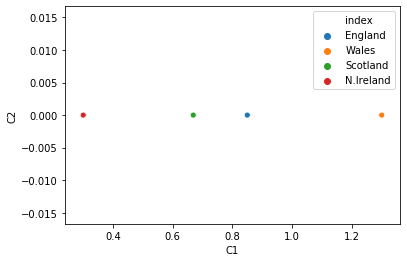

In [322]:
#CODE HERE
sns.scatterplot(data=df_encoded, x="C1", y="C2", hue='index')

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain. (If you're confused about the differences among England, the UK and Great Britain, see: this [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)